**Demonstrate EDA with Pandas**
* Data: https://www.kaggle.com/imoore/2020-us-general-election-turnout-rates
* use thousands in pd.read_csv to remove commas from csv, renamed columns
* plots and sorts
* demonstrate use of iloc and loc and filters



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [6]:
data = pd.read_csv("./data/Election2020.csv", thousands=',') #converts a csv into a dataframe
print(len(data))
data.head() #first 5 rows of the dataframe

52


,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,158835004,NaN,66.4%,239247182,257605088,7.8%,1461074,1962811,616440,3294457,4971025.0,NaN
1,Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,2306587,2297295.0,62.6%,3683055,3837540,2.3%,25898,50997,10266,67782,NaN,AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,367000,NaN,69.8%,525568,551117,3.4%,4293,2074,1348,6927,NaN,AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,NaN,3400000,NaN,65.5%,5189000,5798473,8.9%,38520,76844,7536,93699,NaN,AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,Unofficial,1212030,1206697.0,55.5%,2182375,2331171,3.6%,17510,36719,24698,64974,NaN,AR


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                52 non-null     object 
 1   Source                               40 non-null     object 
 2   Official/Unofficial                  25 non-null     object 
 3   Total Ballots Counted (Estimate)     52 non-null     int64  
 4   Vote for Highest Office (President)  24 non-null     float64
 5   VEP Turnout Rate                     52 non-null     object 
 6   Voting-Eligible Population (VEP)     52 non-null     int64  
 7   Voting-Age Population (VAP)          52 non-null     int64  
 8   % Non-citizen                        52 non-null     object 
 9   Prison                               52 non-null     int64  
 10  Probation                            52 non-null     int64  
 11  Parole                            

In [4]:
data.tail(3) #last 3

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
49,West Virginia,NaN,NaN,"795,000",NaN,57.0%,"1,394,028","1,422,098",0.9%,"6,757","6,593","4,287","15,132",NaN,WV
50,Wisconsin,NaN,NaN,"3,325,000",NaN,76.1%,"4,368,530","4,586,746",3.2%,"23,574","42,909","21,015","71,193",NaN,WI
51,Wyoming,https://sos.wyo.gov/Elections/Docs/2020/2020Ge...,OFFICIAL,"278,503","276,765",64.6%,"431,364","447,915",2.2%,"2,488","5,383",934,"6,759",NaN,WY


In [5]:
data.describe() #gives count, unique, top, and frequency

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
count,52,40,25,52,24,52,52,52,52,52,52,52,52,1,51
unique,52,40,2,50,24,48,52,52,37,50,30,33,50,1,51
top,Oklahoma,http://electionresults.sd.gov/Default.aspx,Unofficial,"3,050,000","2,134,993",64.6%,"5,437,844","5,566,452",3.6%,0,0,0,0,"4,971,025",NC
freq,1,1,23,2,1,2,1,1,5,3,23,20,3,1,1


In [11]:
data.rename(columns={"Total Ballots Counted (Estimate)": "NumBallots", "Vote for Highest Office (President)": "VoteForPresident", "Voting-Eligible Population (VEP)":"EligiblePopulation", "Voting-Age Population (VAP)":"VotingAgePopulation", "% Non-citizen":"PercentNonCitizen"}, inplace = True) 
data.columns#changes names of columns, must use inplace = True to change the dataframe otherwise will make a copy 

Index(['State', 'Source', 'Official/Unofficial', 'NumBallots',
       'VoteForPresident', 'VEP Turnout Rate', 'EligiblePopulation',
       'VotingAgePopulation', 'PercentNonCitizen', 'Prison', 'Probation',
       'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abv'],
      dtype='object')

In [15]:
data.sort_values('NumBallots')

,State,Source,Official/Unofficial,NumBallots,VoteForPresident,VEP Turnout Rate,EligiblePopulation,VotingAgePopulation,PercentNonCitizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
51,Wyoming,https://sos.wyo.gov/Elections/Docs/2020/2020Ge...,OFFICIAL,278503,276765.0,64.6%,431364,447915,2.2%,2488,5383,934,6759,NaN,WY
9,District of Columbia,https://electionresults.dcboe.org/election_res...,NaN,350000,NaN,64.7%,540685,582065,7.1%,0,0,0,0,NaN,DC
35,North Dakota,https://results.sos.nd.gov/Default.aspx?map=Cty,Unofficial,365000,357916.0,64.6%,565143,584610,3.0%,1679,0,0,1679,NaN,ND
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,367000,NaN,69.8%,525568,551117,3.4%,4293,2074,1348,6927,NaN,AK
46,Vermont,https://electionresults.vermont.gov/Index.html...,NaN,370000,NaN,74.0%,499884,511637,2.3%,0,0,0,0,NaN,VT
42,South Dakota,http://electionresults.sd.gov/Default.aspx,Unofficial,427529,422609.0,66.0%,648104,675016,2.4%,3867,5989,3201,10781,NaN,SD
8,Delaware,https://elections.delaware.gov/results/html/in...,Unofficial,507805,502392.0,70.5%,720531,780822,5.8%,5874,14176,350,15013,NaN,DE
40,Rhode Island,NaN,NaN,520000,NaN,65.0%,799642,857507,6.4%,2766,0,0,2766,NaN,RI
12,Hawaii,https://elections.hawaii.gov/wp-content/result...,Unofficial,579165,573854.0,57.5%,1007920,1114466,9.1%,5007,0,0,5007,NaN,HI
27,Montana,https://electionresults.mt.gov/,Unofficial,612055,603635.0,73.1%,837298,851663,1.2%,3754,0,0,3754,NaN,MT


* California has the highest number of ballots counted, while Wyoming has the least ballots counted

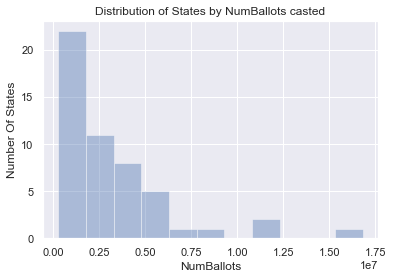

In [25]:
ax = sns.distplot(data.loc[data.State != 'United States'].NumBallots, kde = False)
ax.set(xlabel="NumBallots", ylabel="Number Of States", title="Distribution of States by NumBallots casted")
plt.show()

**LOC and ILOC**
* iloc is to obtain data by index
* loc is to obtain data by label

In [8]:
data.iloc[0] #Index-based selection, gets first row

State                     United States
Source                              NaN
Official/Unofficial                 NaN
TotalBallotsCounted         158,835,004
VoteForPresident                    NaN
VEP Turnout Rate                  66.4%
EligiblePopulation          239,247,182
VotingAgePopulation         257,605,088
PercentNonCitizen                  7.8%
Prison                        1,461,074
Probation                     1,962,811
Parole                          616,440
Total Ineligible Felon        3,294,457
Overseas Eligible             4,971,025
State Abv                           NaN
Name: 0, dtype: object

In [9]:
data.iloc[:4, 3] #select rows 0-3 for column 3 [slice Rows, Column] 

0    158,835,004
1      2,306,587
2        367,000
3      3,400,000
Name: TotalBallotsCounted, dtype: object

In [10]:
data.iloc[0,:5] #[Row of United States, 5 Columns]

State                  United States
Source                           NaN
Official/Unofficial              NaN
TotalBallotsCounted      158,835,004
VoteForPresident                 NaN
Name: 0, dtype: object

In [11]:
data.loc[0:2, 'Prison'] #[Row, Column] indexes inclusively 0:2 would get 3 columns/rows loc stands for label-based selection

0    1,461,074
1       25,898
2        4,293
Name: Prison, dtype: object

**Conditional Selection**

In [12]:
(data.State == 'California')[0:6] #6th state is California True or False

0    False
1    False
2    False
3    False
4    False
5     True
Name: State, dtype: bool

In [13]:
data.loc[data.State == "California"]

,State,Source,Official/Unofficial,TotalBallotsCounted,VoteForPresident,VEP Turnout Rate,EligiblePopulation,VotingAgePopulation,PercentNonCitizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
5,California,https://electionresults.sos.ca.gov/,Unofficial,"16,800,000",NaN,64.7%,"25,962,648","30,783,255",15.0%,"104,730",0,"102,586","207,316",NaN,CA
